# School Dropout

# Limpieza, organizacion y estandarizacion de los datos

In [65]:
# Implementación de las librerias utilizadas.
from IPython.display import display # Para mostrar múltiples resultados en una sola celda.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [2]:
# Subir el archivo CSV

from google.colab import drive


# Montar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Declaracion de variables generales.
df = pd.DataFrame()
df_current = pd.DataFrame()

In [27]:
 # Cargamos el archivo, para su principal lectura y procesamiento de datos.
try:
  df=pd.read_csv('/content/drive/MyDrive/proyecto-tc-final/student_data.csv',sep=';')
  display(df)
except Exception as e:
  print("Algo ocurrio con la lectura del archivo verifica la ruta")
  print(f'Error: {e}')
else:
  print("Lectura finalizada")


,Marital status,Application mode,Application order,Course,evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Output
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


Lectura finalizada


In [28]:
# Obtenemos un panorama general de los datos.
def info_general_df(df):
  print('Información general del DataFrame')
  print(f'Cantidad de filas y columnas: {df.shape}')
  print("-"*50)
  print(f'Cantidad de datos nulos por columna: \n{df.isnull().sum()}')
  print("-"*50)
  print(f'Cantidad de datos únicos por columna: \n{df.nunique()}')
  print("-"*50)
  print(f'Tipos de datos por columna: \n{df.dtypes}')

info_general_df(df)

Información general del DataFrame
Cantidad de filas y columnas: (4424, 35)
--------------------------------------------------
Cantidad de datos nulos por columna: 
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
evening attendance                                0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scho

In [32]:
# Eliminacion de las columnas
df=pd.read_csv('/content/drive/MyDrive/proyecto-tc-final/student_data.csv',sep=';')

df= df.drop(['Application mode', 'Application order','Previous qualification',
               'Previous qualification', 'Mother\'s occupation','Father\'s occupation',
             'Age at enrollment','Curricular units 1st sem (credited)',
             'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)',
             'Curricular units 1st sem (approved)', 'Curricular units 1st sem (without evaluations)',
             'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
             'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
             'Curricular units 2nd sem (without evaluations)', 'Inflation rate', 'GDP']
             , axis=1)

In [33]:
# Renombre de las columnas
df.rename (columns= {
        'Marital status':'Estado_civil',
        'Course':'Curso',
        'evening attendance':'Modalidad_asistencia',
        'Nacionality':'Nacionalidad',
        'Mother\'s qualification':'Cualificación_de_la_madre',
        'Father\'s qualification':'Cualificación_del_padre',
        'Displaced':'Desplazado',
        'Educational special needs':'Necesidades_educativas_especiales',
        'Debtor':'Deudor',
        'Tuition fees up to date':'Matrícula_al_día',
        'Gender':'Género',
        'Scholarship holder':'Titular_de_la_beca',
        'International':'Estudiante_internacional',
        'Curricular units 1st sem (grade)':'Nota_primer_semestre',
        'Curricular units 2nd sem (grade)':'Nota_segundo_semestre',
        'Unemployment rate':'Tasa_de_desempleo',
        'Output': 'Rendimiento',
        }, inplace=True)

In [34]:
# Diccionario
mapping = {
    'Estado_civil': {1: 'Soltero/a',        2: 'Casado/a',    3: 'viudo/a',    4: 'divorciado/a',
                     5: 'unión de hecho/a', 6: 'separado legalmente/a'},

    'Curso': {1: 'Tecnologías de Producción de Biocombustibles',
            2: 'Diseño de Animación y Multimedia',
            3: 'Servicio Social (presencialidad vespertina)',
            4: 'Agronomía',
            5: 'Diseño de Comunicación',
            6: 'Enfermería Veterinaria',
            7: 'Ingeniería Informática ',
            8: 'Equinocultura',
            9: 'Gerencia ',
            10:'Servicio Social',
            11:'Turismo ',
            12: 'Enfermería',
            13: 'Higiene Bucal',
            14: 'Gerencia de Publicidad y Mercadeo',
            15: 'Periodismo y Comunicación',
            16:'Educación Básica',
            17:'Gerencia (presencialidad vespertina)'},

    'Modalidad_asistencia': {1: 'Matutino', 2: 'vespertino'},

    'Nacionalidad': {1: 'Portugués',   2: 'Alemán', 3: 'Español',
            4: 'Italiano',      5: 'Holandés',      6: 'Inglés',     7: 'Lituano',
            8: 'Angoleño',      9:'Caboverdiano',   10:'Guineano',   11: 'Mozambiqueño',
            12: 'Santo Tomé y Príncipe',            13: 'Turco',     14: 'Brasileño',
            15:'Rumano',        16:'Moldavia (República de)',        17: 'Mexicano',
            18: 'Ucraniano',    19: 'Ruso',         20: 'Cubano',    21: 'Colombiano'},


    'Cualificación_de_la_madre': {1: 'Educación Secundaria - 12º Año de Escolaridad o Equiv.',
            2: 'Educación Superior - Licenciatura ',
            3: 'Educación Superior - Grado',
            4: 'Educación Superior - Maestría ',
            5: 'Educación Superior - Doctorado',
            6: 'Frecuencia de Educación Superior',
            7: '12º Año de Escolaridad - No Concluido',
            8: '11º Año de Escolaridad - No Concluido',
            9: '7º Año (Antiguo)',
            10:'Otro - 11º Año de Escolaridad',
            11: '10º Año de Escolaridad',
            12: 'Curso de comercio general',
            13: 'Educación Básica 3er Ciclo (9º/10º/11º Año) o Equiv.',
            14: 'Carrera técnico-profesional',
            15:'7º año de escolaridad',
            16:'2º ciclo del bachillerato general',
            17: '9º año de escolaridad - No concluido ',
            18: '8º año de escolaridad',
            19: 'Desconocido',
            20: 'No sabe leer ni escribir',
            21: 'Puede leer sin haber cursado 4º año de escolaridad',
            22: 'Educación básica 1er ciclo (4º/5º año) o equivalente',
            23: 'Educación básica 2º ciclo (6º/7º/8º año) o equivalente',
            24: 'Carrera de especialización tecnológica',
            25: 'Carrera de grado superior (1er ciclo)',
            26: 'Carrera de grado superior especializada',
            27: 'Carrera técnico superior profesional',
            28: 'Carrera de grado superior - Maestría (2º ciclo)',
            29: 'Carrera de grado superior - Doctorado (3er ciclo)'},


    'Cualificación_del_padre': {1: 'Educación Secundaria - 12º Año de Escolaridad o Equiv.',
            2: 'Educación Superior - Licenciatura ',
            3: 'Educación Superior - Grado',
            4: 'Educación Superior - Maestría ',
            5: 'Educación Superior - Doctorado',
            6: 'Frecuencia de Educación Superior',
            7: '12º Año de Escolaridad - No Concluido',
            8: '11º Año de Escolaridad - No Concluido',
            9: '7º Año (Antiguo)',
            10:'Otro - 11º Año de Escolaridad',
            11: '10º Año de Escolaridad',
            12: 'Curso de comercio general',
            13: 'Educación Básica 3er Ciclo (9º/10º/11º Año) o Equiv.',
            14: 'Carrera técnico-profesional',
            15:'7º año de escolaridad',
            16:'2º ciclo del bachillerato general',
            17: '9º año de escolaridad - No concluido ',
            18: '8º año de escolaridad',
            19: 'Desconocido',
            20: 'No sabe leer ni escribir',
            21: 'Puede leer sin haber cursado 4º año de escolaridad',
            22: 'Educación básica 1er ciclo (4º/5º año) o equivalente',
            23: 'Educación básica 2º ciclo (6º/7º/8º año) o equivalente',
            24: 'Carrera de especialización tecnológica',
            25: 'Carrera de grado superior (1er ciclo)',
            26: 'Carrera de grado superior especializada',
            27: 'Carrera técnico superior profesional',
            28: 'Carrera de grado superior - Maestría (2º ciclo)',
            29: 'Carrera de grado superior - Doctorado (3er ciclo)'},


    'Desplazado': {0: 'No', 1: 'Si'},

    'Necesidades_educativas_especiales': {0: 'No', 1: 'Si'},

    'Deudor': {0: 'No', 1: 'Si'},

    'Matrícula_al_día': {0: 'No', 1: 'Si'},

    'Género': {0: 'Femenino', 1: 'Masculino'},

    'Titular_de_la_beca': {0: 'No', 1: 'Si'},

    'Estudiante_internacional': {0: 'No', 1: 'Si'},
}

In [35]:
# Aplicacion del mapeo a  las múltiples columnas
df = df.replace(mapping)

In [36]:
# Guardar los cambios en un nuevo csv
df.to_csv("Final.csv", index=False)

In [37]:
try:
  df_main=pd.read_csv('Final.csv')
  display(df_main)
except Exception as e:
  print("Algo ocurrio con la lectura del archivo verifica la ruta")
  print(f'Error: {e}')
else:
  print("Lectura finalizada")

,Estado_civil,Curso,Modalidad_asistencia,Nacionalidad,Cualificación_de_la_madre,Cualificación_del_padre,Desplazado,Necesidades_educativas_especiales,Deudor,Matrícula_al_día,Género,Titular_de_la_beca,Estudiante_internacional,Nota_primer_semestre,Nota_segundo_semestre,Tasa_de_desempleo,Rendimiento
0,Soltero/a,Diseño de Animación y Multimedia,Matutino,Portugués,Educación Básica 3er Ciclo (9º/10º/11º Año) o ...,Otro - 11º Año de Escolaridad,Si,No,No,Si,Masculino,No,No,0.000000,0.000000,10.8,Dropout
1,Soltero/a,Turismo,Matutino,Portugués,Educación Secundaria - 12º Año de Escolaridad ...,Educación Superior - Grado,Si,No,No,No,Masculino,No,No,14.000000,13.666667,13.9,Graduate
2,Soltero/a,Diseño de Comunicación,Matutino,Portugués,Educación básica 1er ciclo (4º/5º año) o equiv...,Carrera técnico superior profesional,Si,No,No,No,Masculino,No,No,0.000000,0.000000,10.8,Dropout
3,Soltero/a,Periodismo y Comunicación,Matutino,Portugués,Educación básica 2º ciclo (6º/7º/8º año) o equ...,Carrera técnico superior profesional,Si,No,No,Si,Femenino,No,No,13.428571,12.400000,9.4,Graduate
4,Casado/a,Servicio Social (presencialidad vespertina),0,Portugués,Educación básica 1er ciclo (4º/5º año) o equiv...,Carrera de grado superior - Maestría (2º ciclo),No,No,No,Si,Femenino,No,No,12.333333,13.000000,13.9,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Soltero/a,Periodismo y Comunicación,Matutino,Portugués,Educación Secundaria - 12º Año de Escolaridad ...,Educación Secundaria - 12º Año de Escolaridad ...,No,No,No,Si,Masculino,No,No,13.600000,12.666667,15.5,Graduate
4420,Soltero/a,Periodismo y Comunicación,Matutino,Ruso,Educación Secundaria - 12º Año de Escolaridad ...,Educación Secundaria - 12º Año de Escolaridad ...,Si,No,Si,No,Femenino,No,Si,12.000000,11.000000,11.1,Dropout
4421,Soltero/a,Enfermería,Matutino,Portugués,Educación básica 1er ciclo (4º/5º año) o equiv...,Carrera técnico superior profesional,Si,No,No,Si,Femenino,Si,No,14.912500,13.500000,13.9,Dropout
4422,Soltero/a,Gerencia,Matutino,Portugués,Educación básica 1er ciclo (4º/5º año) o equiv...,Carrera técnico superior profesional,Si,No,No,Si,Femenino,Si,No,13.800000,12.000000,9.4,Graduate


Lectura finalizada


# Calcular metricas y rangos de datos

###Una vez terminado todo el proceso anterior, en el cual redujimos el número de columnas para que únicamente se mantuvieran las que contienen factores de interés para el estudio, pasamos a la parte donde obtenemos qué tanto influye cada uno sobre la deserción escolar.

---



#**Pregunta 1**
###¿Existen diferencias en la tasa de deserción entre las distintas carreras?

In [38]:
# Pregunta 1 ¿Existen diferencias en la tasa de deserción entre las distintas carreras?
# Cargar el archivo
df_main = pd.read_csv('Final.csv')

# Filtra los alumnos que han abandonado
dropouts = df[df_main['Rendimiento'] == 'Dropout']

# Cuenta los alumnos que abandonaron por carrera
abandonos_por_carrera = dropouts['Curso'].value_counts()

# Muestra los resultados con el nombre de la carrera y el numero de abandonos
for carrera, abandonos in abandonos_por_carrera.items():
    print(f"Carrera: {carrera} - Alumnos que abandonaron: {abandonos}")


Carrera: Gerencia (presencialidad vespertina) - Alumnos que abandonaron: 136
Carrera: Gerencia  - Alumnos que abandonaron: 134
Carrera: Enfermería - Alumnos que abandonaron: 118
Carrera: Periodismo y Comunicación - Alumnos que abandonaron: 101
Carrera: Turismo  - Alumnos que abandonaron: 96
Carrera: Gerencia de Publicidad y Mercadeo - Alumnos que abandonaron: 95
Carrera: Ingeniería Informática  - Alumnos que abandonaron: 92
Carrera: Enfermería Veterinaria - Alumnos que abandonaron: 90
Carrera: Agronomía - Alumnos que abandonaron: 86
Carrera: Educación Básica - Alumnos que abandonaron: 85
Carrera: Diseño de Animación y Multimedia - Alumnos que abandonaron: 82
Carrera: Equinocultura - Alumnos que abandonaron: 78
Carrera: Servicio Social (presencialidad vespertina) - Alumnos que abandonaron: 71
Carrera: Servicio Social - Alumnos que abandonaron: 65
Carrera: Diseño de Comunicación - Alumnos que abandonaron: 51
Carrera: Higiene Bucal - Alumnos que abandonaron: 33
Carrera: Tecnologías de Pro

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la serie en un DataFrame para crear una nueva vista manipulable
df_abandonos = abandonos_por_carrera.reset_index()
df_abandonos.columns = ['Carrera', 'Abandonos']  # Renombrar columnas

# Imprimir la nueva tabla
print("Nueva vista de abandonos por carrera:\n", df_abandonos)

Nueva vista de abandonos por carrera:
                                          Carrera  Abandonos
0           Gerencia (presencialidad vespertina)        136
1                                      Gerencia         134
2                                     Enfermería        118
3                      Periodismo y Comunicación        101
4                                       Turismo          96
5              Gerencia de Publicidad y Mercadeo         95
6                        Ingeniería Informática          92
7                         Enfermería Veterinaria         90
8                                      Agronomía         86
9                               Educación Básica         85
10              Diseño de Animación y Multimedia         82
11                                 Equinocultura         78
12   Servicio Social (presencialidad vespertina)         71
13                               Servicio Social         65
14                        Diseño de Comunicación         51
1

In [41]:
# --- 1. Cálculos Estadísticos: Estimados de Locación y Variabilidad ---
media_abandonos = df_abandonos['Abandonos'].mean()
mediana_abandonos = df_abandonos['Abandonos'].median()
varianza_abandonos = df_abandonos['Abandonos'].var()
desviacion_abandonos = df_abandonos['Abandonos'].std()

# Cálculos de Rango Intercuartílico y Percentiles
iqr = df_abandonos['Abandonos'].quantile(0.75) - df_abandonos['Abandonos'].quantile(0.25)
min_val = df_abandonos['Abandonos'].min()
max_val = df_abandonos['Abandonos'].max()
percentiles = df_abandonos['Abandonos'].quantile([0.25, 0.5, 0.75])

#Imprimir todo
print("Media de abandonos:", media_abandonos)
print("Mediana de abandonos:", mediana_abandonos)
print("Varianza de abandonos:", varianza_abandonos)
print("Desviación estándar de abandonos:", desviacion_abandonos)
print("Rango Intercuartílico (IQR):", iqr)
print("Valor minimo:", min_val)
print("Valor maximo:", max_val)
print("Percentiles:\n", percentiles)

Media de abandonos: 83.58823529411765
Mediana de abandonos: 86.0
Varianza de abandonos: 1065.7573529411766
Desviación estándar de abandonos: 32.64593930247951
Rango Intercuartílico (IQR): 25.0
Valor minimo: 8
Valor maximo: 136
Percentiles:
 0.25    71.0
0.50    86.0
0.75    96.0
Name: Abandonos, dtype: float64


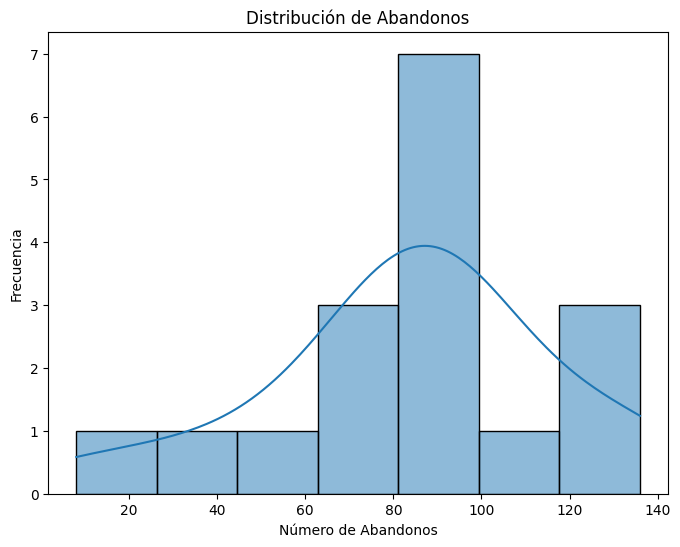

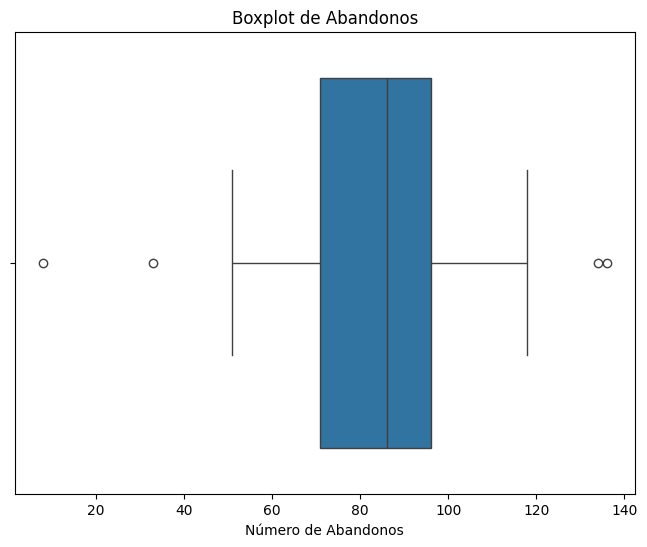

Valores atípicos en abandonos:
                                          Carrera  Abandonos
0           Gerencia (presencialidad vespertina)        136
1                                      Gerencia         134
15                                 Higiene Bucal         33
16  Tecnologías de Producción de Biocombustibles          8


In [43]:
# --- 2. Visualización de Distribuciones ---
# Histograma de los abandonos
plt.figure(figsize=(8, 6))
sns.histplot(df_abandonos['Abandonos'], kde=True)
plt.title("Distribución de Abandonos")
plt.xlabel("Número de Abandonos")
plt.ylabel("Frecuencia")
plt.show()
#Cada barra representa un rango de valores de abandono,
#la altura indica cuántas carreras tienen ese número de abandonos

# Boxplot para detectar valores atípicos
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_abandonos['Abandonos'])
plt.title("Boxplot de Abandonos")
plt.xlabel("Número de Abandonos")
plt.show()

# Identificación de valores atípicos usando el Score de Rango Intercuartílico (IQR)
Q1 = df_abandonos['Abandonos'].quantile(0.25)
Q3 = df_abandonos['Abandonos'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_abandonos[(df_abandonos['Abandonos'] < (Q1 - 1.5 * IQR)) | (df_abandonos['Abandonos'] > (Q3 + 1.5 * IQR))]
print("Valores atípicos en abandonos:\n", outliers)
# Valores a tomar en cuenta

<ipython-input-44-e557221327c2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Abandonos', y='Carrera', data=df_abandonos, palette="viridis")


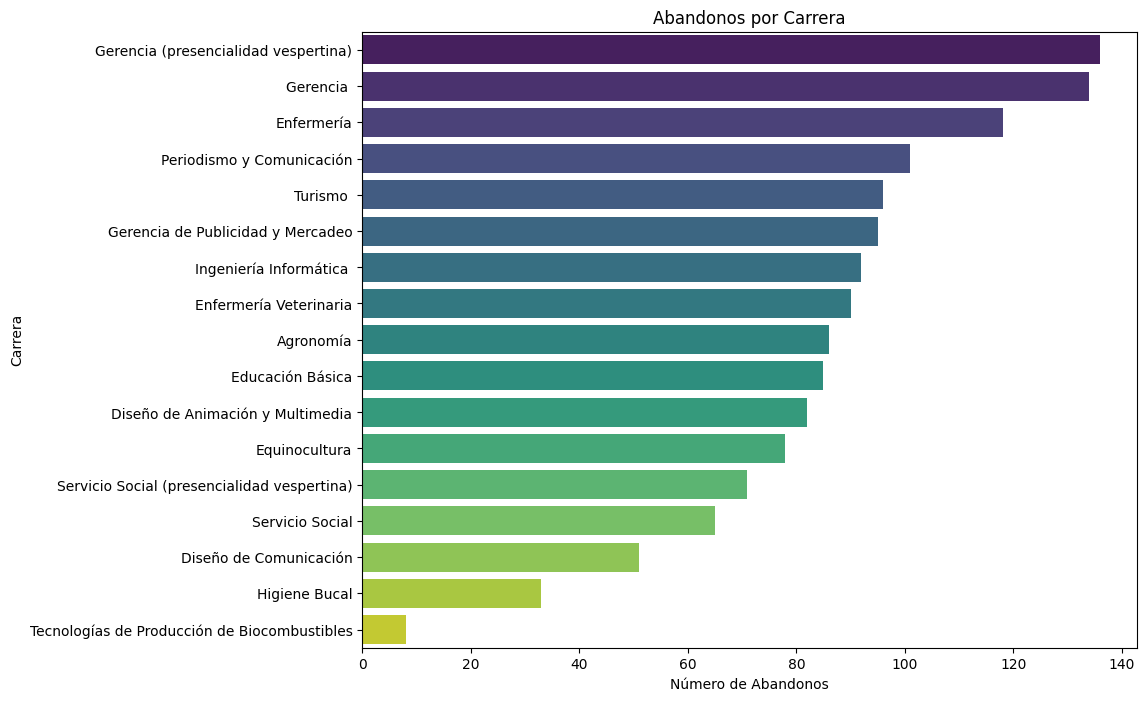

In [44]:
# --- 3. Exploración de Variables Categóricas ---
# Gráfico de barras de abandonos por carrera
plt.figure(figsize=(10, 8))
sns.barplot(x='Abandonos', y='Carrera', data=df_abandonos, palette="viridis")
plt.title("Abandonos por Carrera")
plt.xlabel("Número de Abandonos")
plt.ylabel("Carrera")
plt.show()

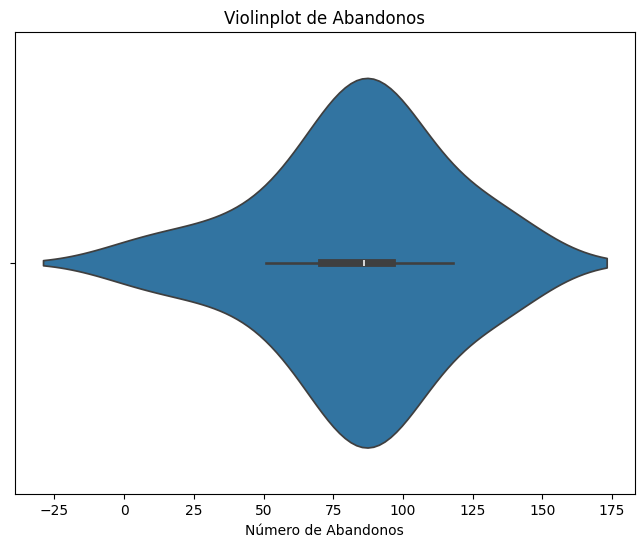

In [45]:
# Violinplot
plt.figure(figsize=(8, 6))
sns.violinplot(x=df_abandonos['Abandonos'])
plt.title("Violinplot de Abandonos")
plt.xlabel("Número de Abandonos")
plt.show()

#Pregunta 2
###¿Existen diferencias en las tasas de deserción entre estudiantes desplazados y no desplazados?


In [46]:
# Pregunta 2 ¿Existen diferencias en las tasas de deserción entre estudiantes desplazados y no desplazados?

# Filtrar los alumnos que han abandonado
dropouts = df[df_main['Rendimiento'] == 'Dropout']

# Contar los abandonos por estado de desplazamiento
abandonos_por_desplazamiento = dropouts['Desplazado'].value_counts()

# Mostrar los resultados
abandonos_por_desplazamiento

,count
Desplazado,
No,752
Si,669


# **Pregunta 3**
###¿Existe una correlación significativa entre el nivel educativo de los padres y la probabilidad de deserción de los estudiantes?

In [47]:
# Pregunta 3 ¿Existe una correlación significativa entre el nivel educativo de los padres y la probabilidad de deserción de los estudiantes?
# Crear una tabla que cuente las deserciones por cualificación de la madre y del padre
abandonos_por_cualificacion = dropouts.groupby(['Cualificación_de_la_madre', 'Cualificación_del_padre']).size().reset_index(name='Abandonos')

# Mostrar los resultados
abandonos_por_cualificacion

,Cualificación_de_la_madre,Cualificación_del_padre,Abandonos
0,10º Año de Escolaridad,7º Año (Antiguo),1
1,11º Año de Escolaridad - No Concluido,11º Año de Escolaridad - No Concluido,1
2,11º Año de Escolaridad - No Concluido,Otro - 11º Año de Escolaridad,1
3,12º Año de Escolaridad - No Concluido,2º ciclo del bachillerato general,1
4,12º Año de Escolaridad - No Concluido,Carrera técnico-profesional,2
...,...,...,...
117,Otro - 11º Año de Escolaridad,Educación Superior - Grado,3
118,Otro - 11º Año de Escolaridad,Educación Superior - Licenciatura,1
119,Otro - 11º Año de Escolaridad,Otro - 11º Año de Escolaridad,4
120,Puede leer sin haber cursado 4º año de escolar...,Carrera de grado superior especializada,1


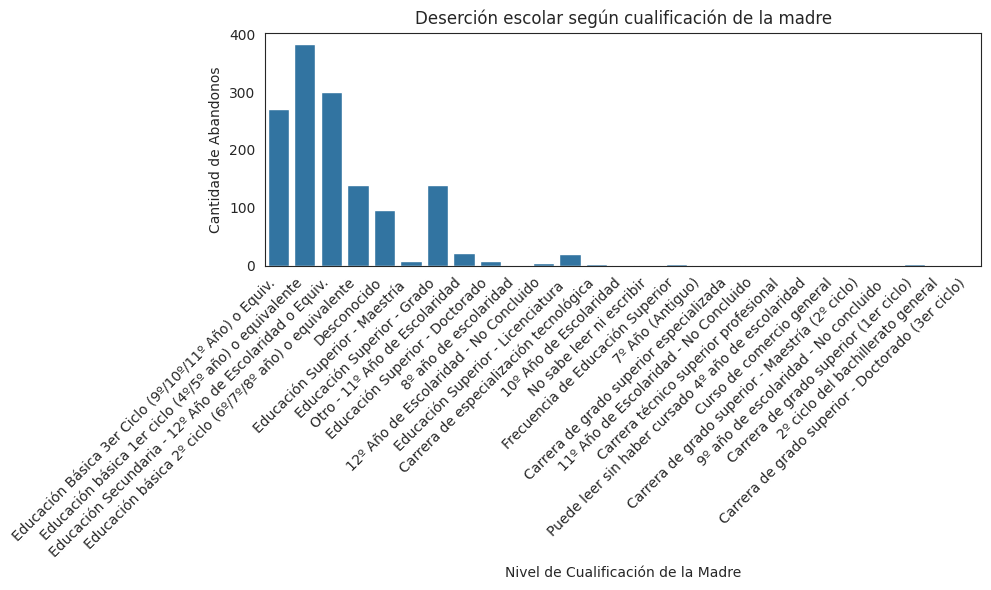

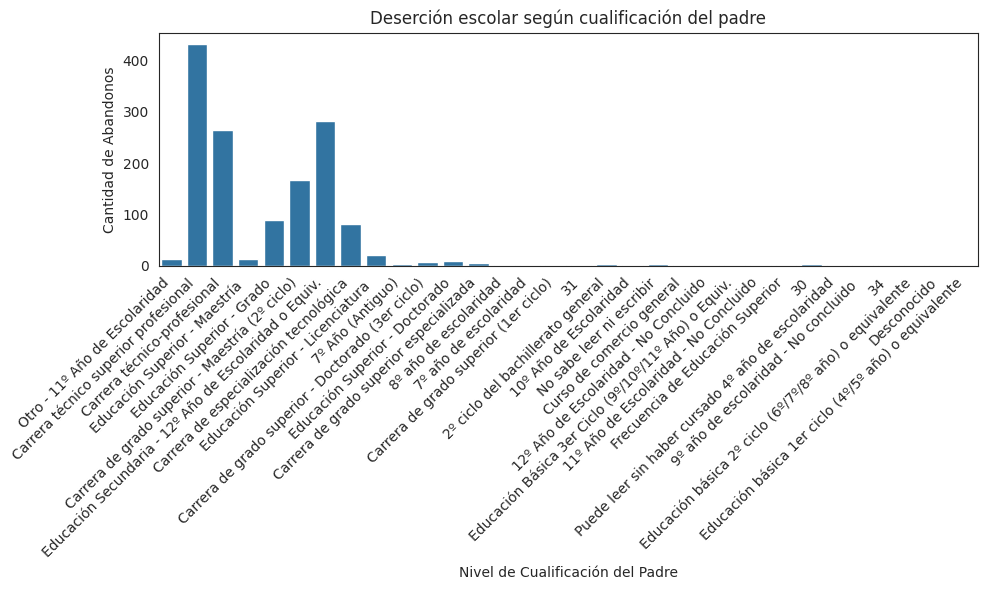

Tabla de Contingencia - Cualificación de la Madre vs. Rendimiento:
Rendimiento                                         Dropout  Enrolled  \
Cualificación_de_la_madre                                               
10º Año de Escolaridad                                    1         0   
11º Año de Escolaridad - No Concluido                     2         0   
12º Año de Escolaridad - No Concluido                     5         0   
2º ciclo del bachillerato general                         1         0   
7º Año (Antiguo)                                          2         0   
7º año de escolaridad                                     0         0   
8º año de escolaridad                                     1         0   
9º año de escolaridad - No concluido                      1         0   
Carrera de especialización tecnológica                    4         2   
Carrera de grado superior (1er ciclo)                     3         1   
Carrera de grado superior - Doctorado (3er ciclo)        

In [66]:
# Pregunta 3 ¿Qué relación existe entre la cualificación de los padres y la deserción escolar?

# --- Visualización de la cualificación de los padres y deserción escolar ---
# Gráfico de barras para la cualificación de la madre y abandonos
plt.figure(figsize=(10, 6))
sns.countplot(data=dropouts, x='Cualificación_de_la_madre')
plt.title('Deserción escolar según cualificación de la madre')
plt.xlabel('Nivel de Cualificación de la Madre')
plt.ylabel('Cantidad de Abandonos')
plt.xticks(rotation=45, ha='right', fontsize=10 )
plt.tight_layout()
plt.show()

# Gráfico de barras para la cualificación del padre y abandonos
plt.figure(figsize=(10, 6))
sns.countplot(data=dropouts, x='Cualificación_del_padre')
plt.title('Deserción escolar según cualificación del padre')
plt.xlabel('Nivel de Cualificación del Padre')
plt.ylabel('Cantidad de Abandonos')
plt.xticks(rotation=45, ha='right', fontsize=10 )
plt.tight_layout()
plt.show()

# --- Tabla de contingencia y análisis de chi-cuadrado ---
# Crear tabla de contingencia para cualificación de la madre
contingency_madre = pd.crosstab(df['Cualificación_de_la_madre'], df['Rendimiento'])
print("Tabla de Contingencia - Cualificación de la Madre vs. Rendimiento:")
print(contingency_madre)

# Test de chi2 para cualificación de la madre y deserción escolar
chi2, p, dof, expected = chi2_contingency(contingency_madre)
print(f"Resultados Chi-Cuadrado (Madre): Chi2 = {chi2}, p-value = {p}")
if p < 0.05:
    print("Existe una relación significativa entre la cualificación de la madre y la deserción escolar.")
else:
    print("No hay una relación significativa entre la cualificación de la madre y la deserción escolar.")

# Crear tabla de contingencia para cualificación del padre
contingency_padre = pd.crosstab(df['Cualificación_del_padre'], df['Rendimiento'])
print("\nTabla de Contingencia - Cualificación del Padre vs. Rendimiento:")
print(contingency_padre)

# Test de chi2 para cualificación del padre y deserción escolar
chi2, p, dof, expected = chi2_contingency(contingency_padre)
print(f"\nResultados Chi-Cuadrado (Padre): Chi2 = {chi2}, p-value = {p}")

if p < 0.05:
    print("Existe una relación significativa entre la cualificación del padre y la deserción escolar.")
else:
    print("No hay una relación significativa entre la cualificación del padre y la deserción escolar.")


#**Pregunta 4**
###¿Hay diferencias notables en las tasas de deserción entre estudiantes de diferentes géneros? Existe alguna diferencia entre los promedios por genero

In [67]:
#Pregunta 4 ¿Hay diferencias notables en las tasas de deserción entre estudiantes de diferentes géneros?
# Contar los abandonos por género
abandonos_por_genero = dropouts['Género'].value_counts()

# Mostrar los resultados
abandonos_por_genero


,count
Género,
Femenino,720
Masculino,701


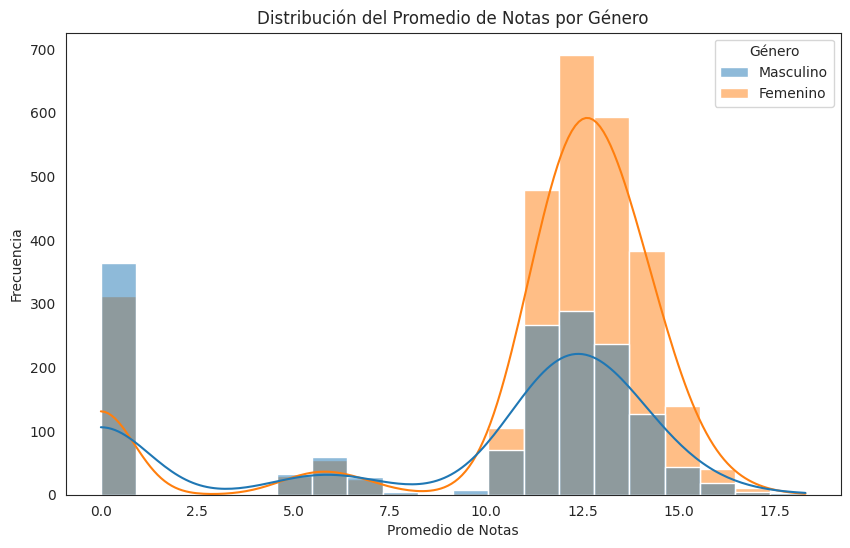

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar la base de datos
# Asegúrate de cambiar la ruta del archivo a la ubicación correcta en tu entorno
data = df=pd.read_csv('Final.csv')
# Crear una columna de promedio de notas
data['Promedio_notas'] = data[['Nota_primer_semestre', 'Nota_segundo_semestre']].mean(axis=1)

# Generar la gráfica de distribución del promedio de notas por género
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Promedio_notas', hue='Género', kde=True, bins=20)
plt.title('Distribución del Promedio de Notas por Género')
plt.xlabel('Promedio de Notas')
plt.ylabel('Frecuencia')
plt.show()

# **Pregunta 5**
###¿Qué relación existe entre el número de deudas financieras de los estudiantes y su probabilidad de deserción?

In [53]:
#Verificamos cuántos alumnos cumplen con la condición de ser deudores dentro de este sector ya filtrado
deudor= (dropouts["Deudor"]=="Si").sum()

dropouts_total= dropouts["Deudor"].count()
print(f'El total de personas con deserción es de {dropouts_total}')

#Verificamos cuántos alumnos tienen su matrícula al día
mat_dia= (dropouts["Matrícula_al_día"]=="No").sum()

print(f'El número de alumnos con deudas es de: {deudor}')
print(f'El número de alumnos que no están al día con sus cuotas es de: {mat_dia}')

El total de personas con deserción es de 1421
El número de alumnos con deudas es de: 312
El número de alumnos que no están al día con sus cuotas es de: 457


###Ya que vimos la cantidad de deudores y que no es la misma cantidad de personas que no están al corriente con su matriculación, podemos inferir que hay personas que cumplen con ambas condiciones. Verificaremos esto en la siguiente sección:

In [54]:
#Vemos cuántos de los alumnos que no tienen la matrícula al día también son deudores

conteo_deuda_sin_matricular=((dropouts["Deudor"]=="Si")&(dropouts["Matrícula_al_día"]=="No")).sum()
print(f'El número total de alumnos que tienen deudas y no están al corriente en su matriculación es: {conteo_deuda_sin_matricular}')

p_drop_debt=(conteo_deuda_sin_matricular/dropouts_total)*100

print(f'El porcentaje que esto representa del total es de: {p_drop_debt:.2f}%')

alumnos_prob_finanzas=(deudor+mat_dia-conteo_deuda_sin_matricular)
print(f'El total de alumnos que tienen algún problema de finanzas es: {alumnos_prob_finanzas}')
porc_alumnos_prob_finanzas=(alumnos_prob_finanzas/dropouts_total)*100
print(f'El porcentaje que esto representa del total es de: {porc_alumnos_prob_finanzas:.2f}%')

El número total de alumnos que tienen deudas y no están al corriente en su matriculación es: 215
El porcentaje que esto representa del total es de: 15.13%
El total de alumnos que tienen algún problema de finanzas es: 554
El porcentaje que esto representa del total es de: 38.99%


#Visualización de los datos
Como tal vez ya sabemos, es más fácil poder hacer un análisis estadístico si tenemos una visualización clara de nuestras variables. Para esto, dado que las variables medidas son binarias (solo tenemos 2 respuestas), se optó por una gráfica de barras apilada.

Esta gráfica la podemos ver a continuación:

In [55]:
df_main.head()

,Estado_civil,Curso,Modalidad_asistencia,Nacionalidad,Cualificación_de_la_madre,Cualificación_del_padre,Desplazado,Necesidades_educativas_especiales,Deudor,Matrícula_al_día,Género,Titular_de_la_beca,Estudiante_internacional,Nota_primer_semestre,Nota_segundo_semestre,Tasa_de_desempleo,Rendimiento
0,Soltero/a,Diseño de Animación y Multimedia,Matutino,Portugués,Educación Básica 3er Ciclo (9º/10º/11º Año) o ...,Otro - 11º Año de Escolaridad,Si,No,No,Si,Masculino,No,No,0.000000,0.000000,10.8,Dropout
1,Soltero/a,Turismo,Matutino,Portugués,Educación Secundaria - 12º Año de Escolaridad ...,Educación Superior - Grado,Si,No,No,No,Masculino,No,No,14.000000,13.666667,13.9,Graduate
2,Soltero/a,Diseño de Comunicación,Matutino,Portugués,Educación básica 1er ciclo (4º/5º año) o equiv...,Carrera técnico superior profesional,Si,No,No,No,Masculino,No,No,0.000000,0.000000,10.8,Dropout
3,Soltero/a,Periodismo y Comunicación,Matutino,Portugués,Educación básica 2º ciclo (6º/7º/8º año) o equ...,Carrera técnico superior profesional,Si,No,No,Si,Femenino,No,No,13.428571,12.400000,9.4,Graduate
4,Casado/a,Servicio Social (presencialidad vespertina),0,Portugués,Educación básica 1er ciclo (4º/5º año) o equiv...,Carrera de grado superior - Maestría (2º ciclo),No,No,No,Si,Femenino,No,No,12.333333,13.000000,13.9,Graduate


In [56]:
#creando la tabla de datos
crosstab_table1=pd.crosstab(df_main["Deudor"], df_main["Rendimiento"])
print(crosstab_table1)

Rendimiento  Dropout  Enrolled  Graduate
Deudor                                  
No              1109       704      2108
Si               312        90       101


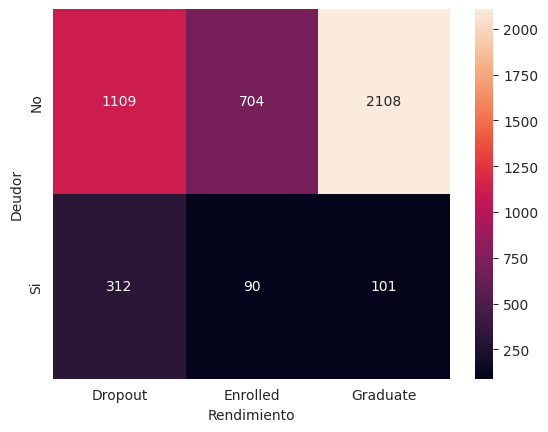

In [57]:
sns.set_style('white')
sns.heatmap(crosstab_table1, annot=True, fmt='d')
plt.show()

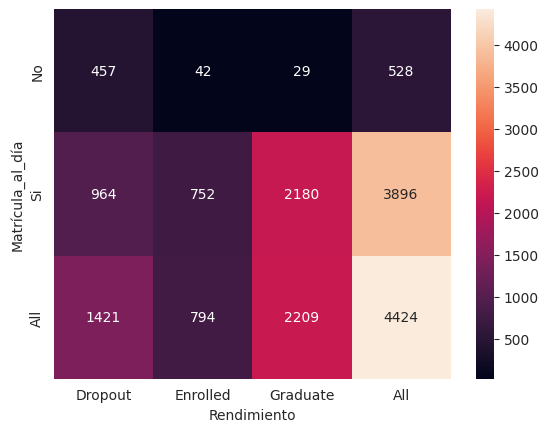

In [58]:
crosstab_table2=pd.crosstab(df_main["Matrícula_al_día"], df_main["Rendimiento"],margins=True)

sns.heatmap(crosstab_table2, annot=True, fmt='d')
plt.show()

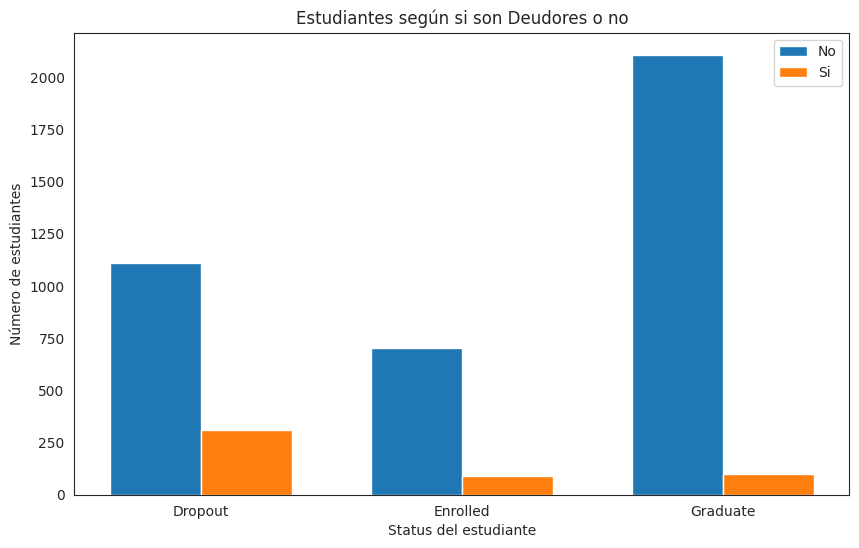

In [59]:
#sns.barplot(x='Rendimiento', y="Deudor", hue='Resultado', data=df)
# Configuración de la gráfica
fig, ax = plt.subplots(figsize=(10, 6))

# Configuración de posiciones y ancho de las barras
bar_width = 0.35
index = np.arange(len(crosstab_table1.columns))

# Gráfica de barras para cada categoría
for i, category in enumerate(crosstab_table1.index):
    ax.bar(index + i * bar_width, crosstab_table1.loc[category], bar_width, label=category)

# Etiquetas y leyenda
ax.set_xlabel('Status del estudiante')
ax.set_ylabel('Número de estudiantes')
ax.set_title('Estudiantes según si son Deudores o no')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(crosstab_table1.columns)
ax.legend()

plt.show()

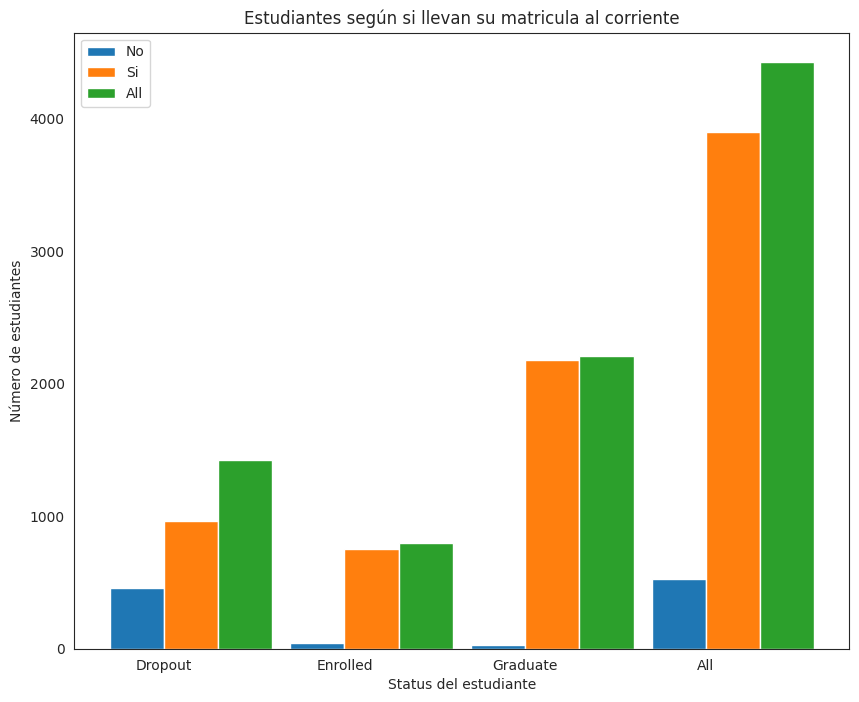

In [60]:
# Configuración de la gráfica
fig, ax = plt.subplots(figsize=(10, 8))

# Configuración de posiciones y ancho de las barras
bar_width = 0.3
index = np.arange(len(crosstab_table2.columns))

# Gráfica de barras para cada categoría
for i, category in enumerate(crosstab_table2.index):
    ax.bar(index + i * bar_width, crosstab_table2.loc[category], bar_width, label=category)

# Etiquetas y leyenda
ax.set_xlabel('Status del estudiante')
ax.set_ylabel('Número de estudiantes')
ax.set_title('Estudiantes según si llevan su matricula al corriente')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(crosstab_table2.columns)
ax.legend()

plt.show()

#**Pregunta 6: Relación entre las calificaciones de los primeros semestres y la deserción escolar**

<ipython-input-62-94ef657f8976>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seleccionado["Promedio Final"] = df_seleccionado[["Nota Primer Semestre", "Nota Segundo Semestre"]].mean(axis=1)
<ipython-input-62-94ef657f8976>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seleccionado['Aprobo'] = df_seleccionado['Promedio Final'] >= 6
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  

Precisión del modelo: 0.9988700564971752
Predicción para el nuevo estudiante: [ True]


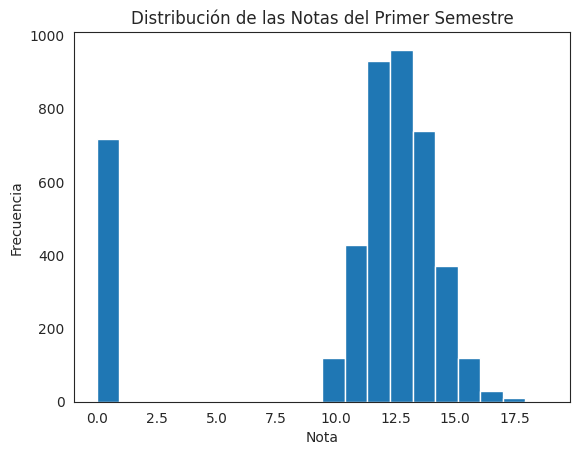

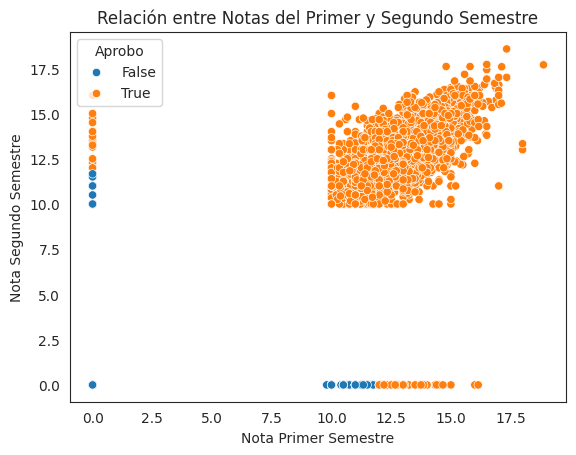

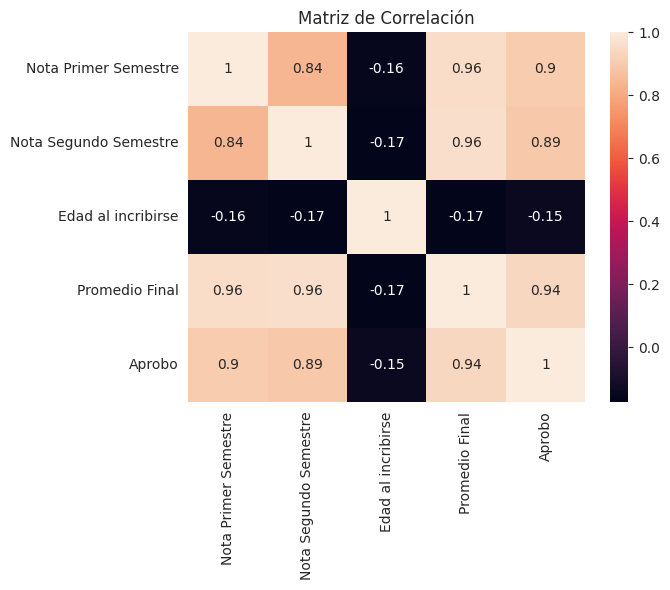

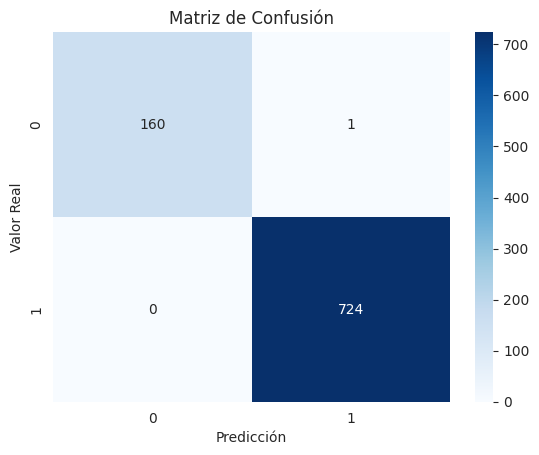

      Nota Primer Semestre  Nota Segundo Semestre  Edad al incribirse  \
0                 0.000000               0.000000                  20   
1                14.000000              13.666667                  19   
2                 0.000000               0.000000                  19   
3                13.428571              12.400000                  20   
4                12.333333              13.000000                  45   
...                    ...                    ...                 ...   
4419             13.600000              12.666667                  19   
4420             12.000000              11.000000                  18   
4421             14.912500              13.500000                  30   
4422             13.800000              12.000000                  20   
4423             11.666667              13.000000                  22   

      Promedio Final  Aprobo  
0           0.000000   False  
1          13.833333    True  
2           0.000000   False  

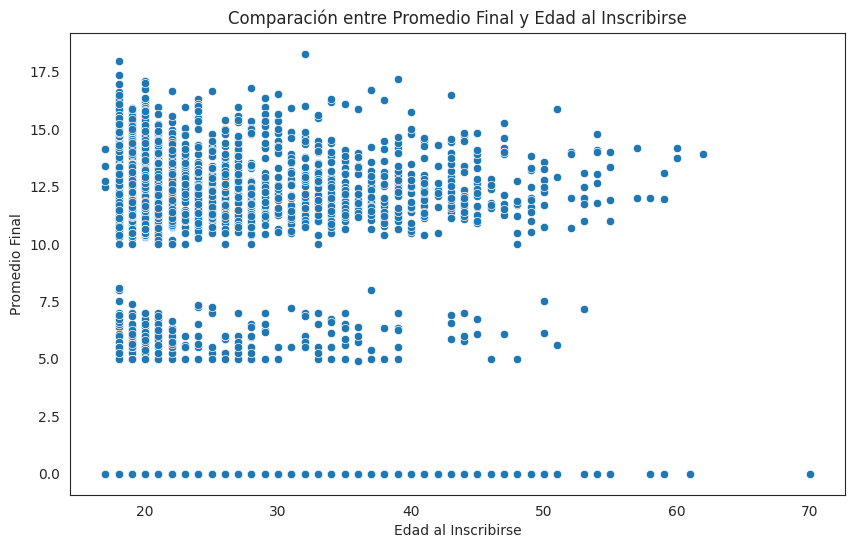

In [62]:
# Leer el archivo CSV
df = pd.read_csv("/content/drive/MyDrive/proyecto-tc-final/FinalP.csv")

# Seleccionar las columnas deseadas
columnas_seleccionadas = ["Nota Primer Semestre","Nota Segundo Semestre","Edad al incribirse"]
df_seleccionado = df[columnas_seleccionadas]

# Calcular el promedio final y agregarlo como una nueva columna
df_seleccionado["Promedio Final"] = df_seleccionado[["Nota Primer Semestre", "Nota Segundo Semestre"]].mean(axis=1)

# Se crea una nueva columna "Aprobo" (promedio mayor o igual a 6 es aprobado)
df_seleccionado['Aprobo'] = df_seleccionado['Promedio Final'] >= 6

# Separamos las características (X) y la etiqueta (y)
X = df_seleccionado[['Nota Primer Semestre', 'Nota Segundo Semestre', 'Edad al incribirse']]
y = df_seleccionado['Aprobo']

# Dividimow los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Hacemos las predicciones en conjunto de prueba
y_pred = model.predict(X_test)

# muestra delmodelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

#   Predicción para un nuevo estudiante
nuevo_estudiante = [[7, 8, 20]]  # Nota Primer Semestre, Nota Segundo Semestre, Edad
prediccion = model.predict(nuevo_estudiante)
print("Predicción para el nuevo estudiante:", prediccion)

#                                    Visualizaciones de los analisis


# Histograma de las notas
plt.hist(df_seleccionado['Nota Primer Semestre'], bins=20)
plt.title('Distribución de las Notas del Primer Semestre')
plt.xlabel('Nota')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de dispersión: Nota Primer Semestre vs. Nota Segundo Semestre
sns.scatterplot(x='Nota Primer Semestre', y='Nota Segundo Semestre', hue='Aprobo', data=df_seleccionado)
plt.title('Relación entre Notas del Primer y Segundo Semestre')
plt.show()

# Matriz de correlación
corr_matrix = df_seleccionado.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Matriz de Correlación')
plt.show()

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')

plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()


# Mostrar los datos con el promedio final
print(df_seleccionado)

# Gráfica comparando Promedio Final y Edad al inscribirse
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Edad al incribirse', y='Promedio Final', data=df_seleccionado)
plt.title('Comparación entre Promedio Final y Edad al Inscribirse')
plt.xlabel('Edad al Inscribirse')
plt.ylabel('Promedio Final')
plt.show()